# Flavours of Physics: Identify a rare decay phenomenon

## Strategy

1. This dataset can be imbalanced dataset.

## To Do

1. stratified train test splitting of data.
1. Create animated histogram for better visualization. <https://matplotlib.org/stable/gallery/animation/animated_histogram.html#sphx-glr-gallery-animation-animated-histogram-py>

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

print('Pandas version: {}'.format(pd.__version__))

Pandas version: 1.5.1


## Getting the data

In [2]:
# On cloud

# train_df = pd.read_csv('/kaggle/input/flavours-of-physics/training.csv.zip')
# test_df = pd.read_csv('/kaggle/input/flavours-of-physics/test.csv.zip')
# check_agreement_df = pd.read_csv('/kaggle/input/flavours-of-physics/check_agreement.csv.zip')
# check_correlation_df = pd.read_csv('/kaggle/input/flavours-of-physics/check_correlation.csv.zip')
# sample_submission_df = pd.read_csv('/kaggle/input/flavours-of-physics/sample_submission.csv.zip')

In [2]:
# On local Machine
dataset_path = Path(Path.cwd().parent, 'datasets', 'flavours-of-physics')

# Get the paths
train_path = Path(dataset_path, 'training.csv.zip')
test_path = Path(dataset_path, 'test.csv.zip')
sample_submission_path = Path(dataset_path, 'sample_submission.csv.zip')
check_correlation_path = Path(dataset_path, 'check_correlation.csv.zip')
check_aggrement_path = Path(dataset_path, 'check_agreement.csv.zip')

# load datasets as pandas dataframe
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
sample_submission_df = pd.read_csv(sample_submission_path)
check_correlation_df = pd.read_csv(check_correlation_path)
check_aggrement_df = pd.read_csv(check_aggrement_path)

# Explore the Data

In [3]:
train_df.head(10)

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,...,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
1,5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,...,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
2,11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,...,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
3,15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,...,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
4,1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,...,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060
5,18316844,0.000819,0.995340,3.638690,0.250140,0.232313,12.628694,13.217284,1452.949585,0.105752,...,12886.835938,8040.938477,3.673540,3.150380,2.974392,258,-99,0,1823.130981,0.272359
6,16522942,0.005190,0.999985,38.920113,0.151273,0.216020,15.352684,1.700249,3912.482666,0.006991,...,24599.054688,10370.023438,2.495311,3.306201,2.926639,358,-99,0,1665.762939,0.229626
7,3341177,0.000632,0.999601,4.127854,0.149296,0.115681,10.482354,10.820628,7682.583008,0.052060,...,20122.953125,8500.297852,2.179665,2.471615,2.449492,292,-99,0,1930.380981,0.370381
8,13870233,0.001652,0.999876,11.274630,0.320217,0.177103,8.269794,3.301484,3796.261719,0.079522,...,10330.231445,24728.355469,3.445711,2.545625,3.273179,222,-99,0,1839.758057,0.348409
9,17913585,0.001048,0.999771,8.732768,0.754453,0.268545,11.076645,5.844945,1901.681274,0.041319,...,15422.355469,25520.925781,3.986849,3.874437,3.473346,454,-99,0,1809.005981,0.269867


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67553 entries, 0 to 67552
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   67553 non-null  int64  
 1   LifeTime             67553 non-null  float64
 2   dira                 67553 non-null  float64
 3   FlightDistance       67553 non-null  float64
 4   FlightDistanceError  67553 non-null  float64
 5   IP                   67553 non-null  float64
 6   IPSig                67553 non-null  float64
 7   VertexChi2           67553 non-null  float64
 8   pt                   67553 non-null  float64
 9   DOCAone              67553 non-null  float64
 10  DOCAtwo              67553 non-null  float64
 11  DOCAthree            67553 non-null  float64
 12  IP_p0p2              67553 non-null  float64
 13  IP_p1p2              67553 non-null  float64
 14  isolationa           67553 non-null  int64  
 15  isolationb           67553 non-null 

- Total attributes: 51
- Target attribute: 'signal'
- float64 attributes: 44
- int64 attributes: 7
- Columns with missing values: None

In [5]:
train_df['signal'].value_counts()

1    41674
0    25879
Name: signal, dtype: int64

In [6]:
print('Positive samples: {}'.format(len(train_df[train_df['signal'] == 1])))
print('Negative samples: {}'.format(len(train_df[train_df['signal'] == 0])))

print('Positive sample %:  {}'.format((len(train_df[train_df['signal'] == 1])/len(train_df))*100))
print('Positive sample %:  {}'.format((len(train_df[train_df['signal'] == 0])/len(train_df))*100))

Positive samples: 41674
Negative samples: 25879
Positive sample %:  61.69082054090862
Positive sample %:  38.30917945909138


## Visualize the Data

In [11]:
attribute = list(train_df)
print(attribute)

['id', 'LifeTime', 'dira', 'FlightDistance', 'FlightDistanceError', 'IP', 'IPSig', 'VertexChi2', 'pt', 'DOCAone', 'DOCAtwo', 'DOCAthree', 'IP_p0p2', 'IP_p1p2', 'isolationa', 'isolationb', 'isolationc', 'isolationd', 'isolatione', 'isolationf', 'iso', 'CDF1', 'CDF2', 'CDF3', 'ISO_SumBDT', 'p0_IsoBDT', 'p1_IsoBDT', 'p2_IsoBDT', 'p0_track_Chi2Dof', 'p1_track_Chi2Dof', 'p2_track_Chi2Dof', 'p0_IP', 'p1_IP', 'p2_IP', 'p0_IPSig', 'p1_IPSig', 'p2_IPSig', 'p0_pt', 'p1_pt', 'p2_pt', 'p0_p', 'p1_p', 'p2_p', 'p0_eta', 'p1_eta', 'p2_eta', 'SPDhits', 'production', 'signal', 'mass', 'min_ANNmuon']


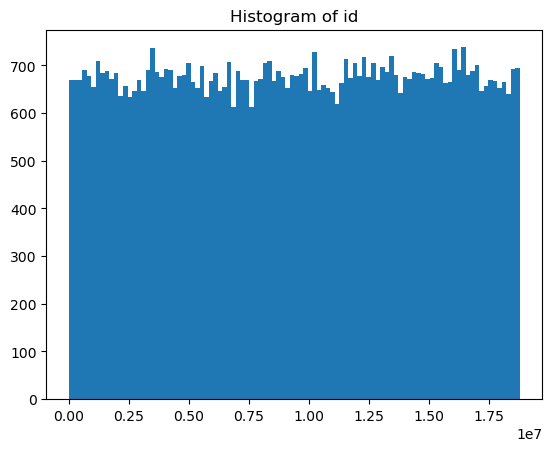

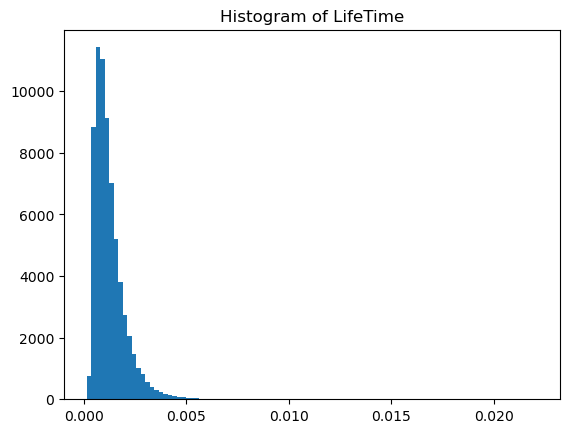

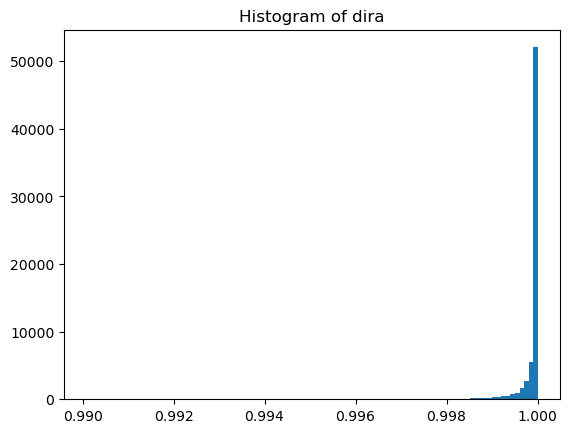

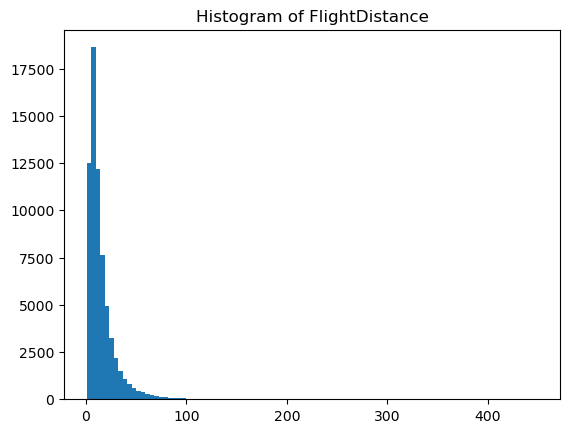

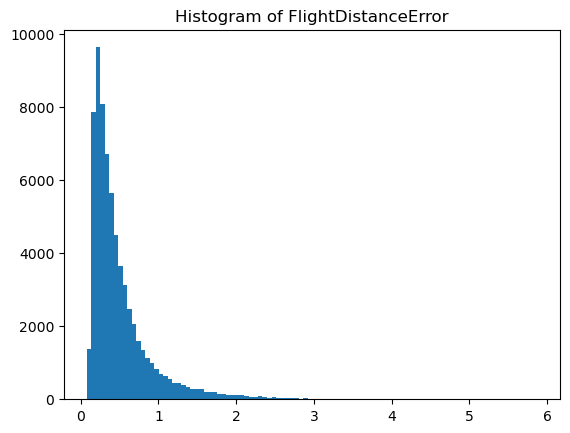

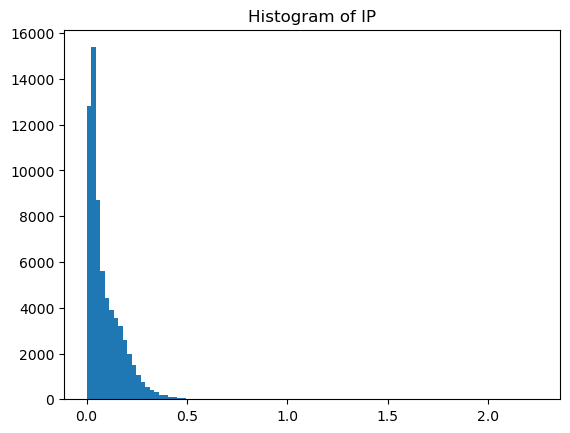

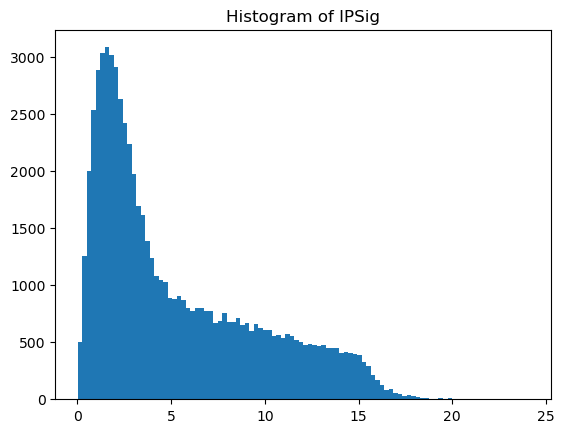

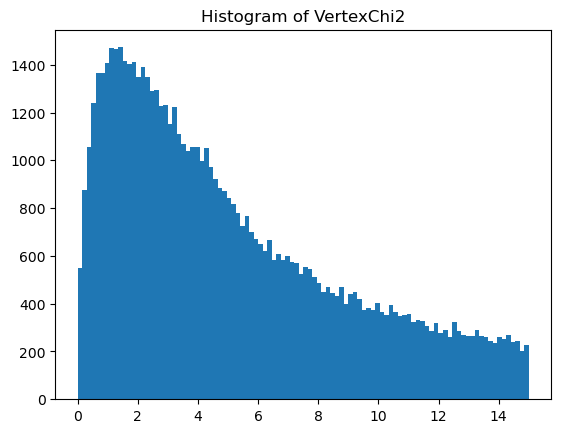

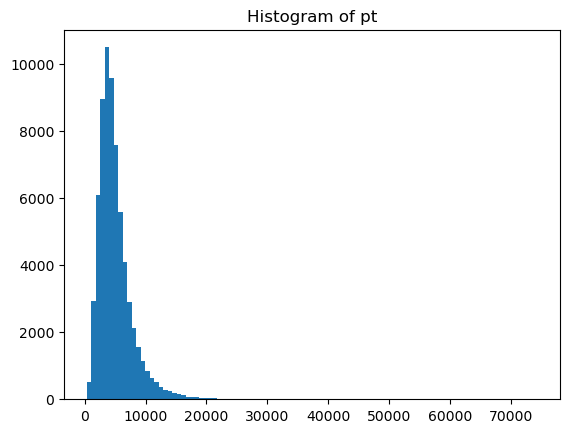

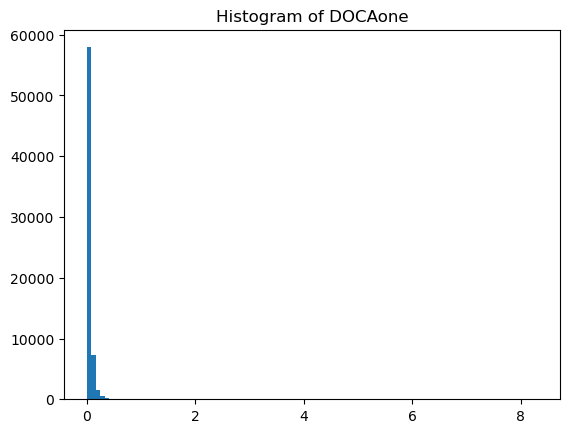

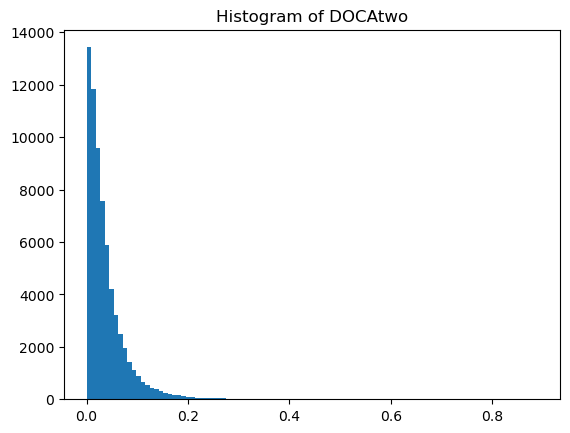

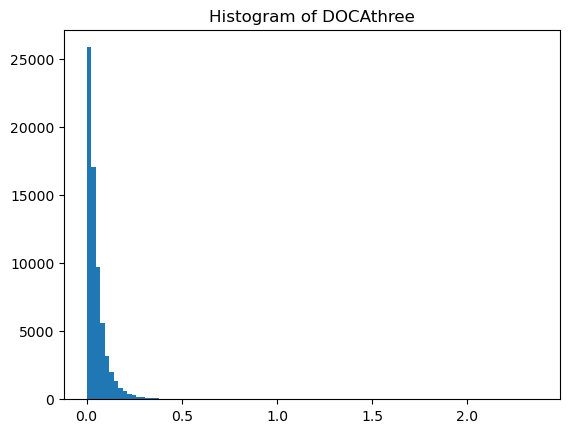

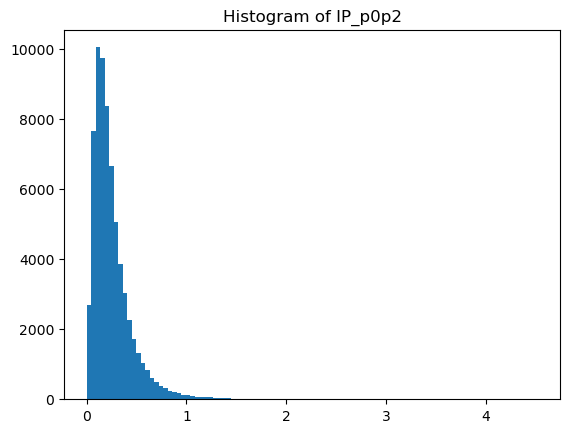

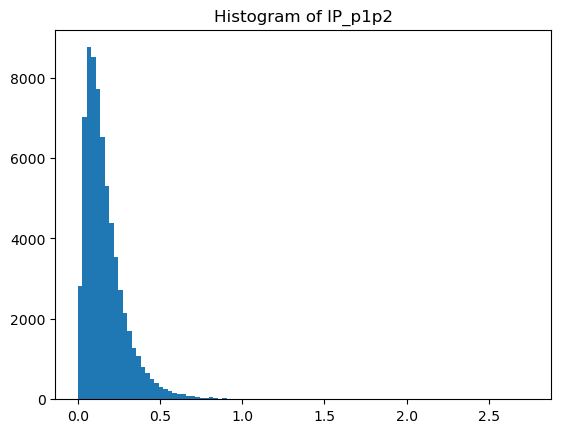

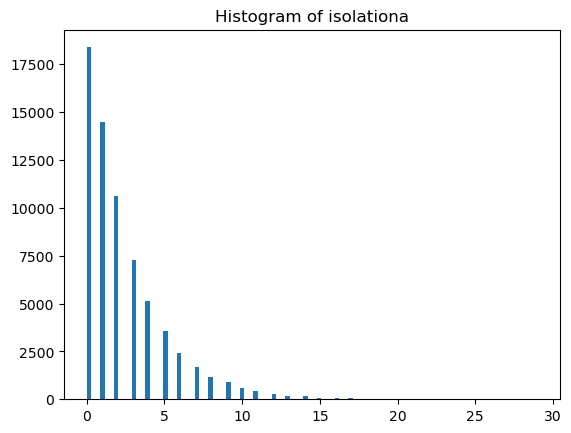

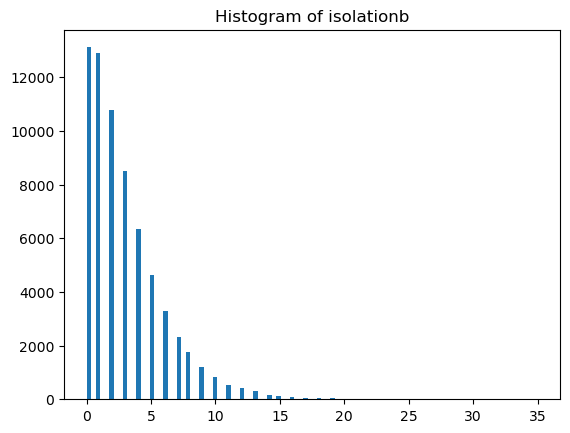

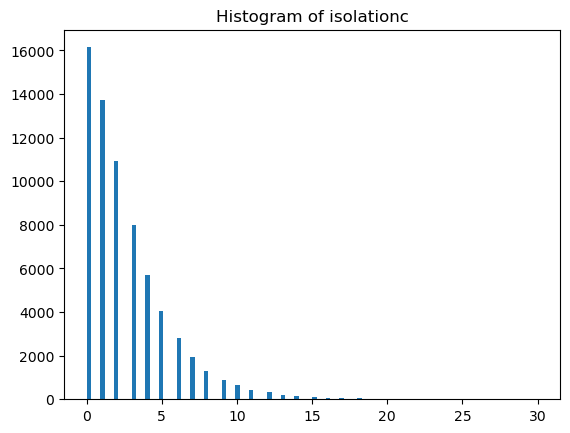

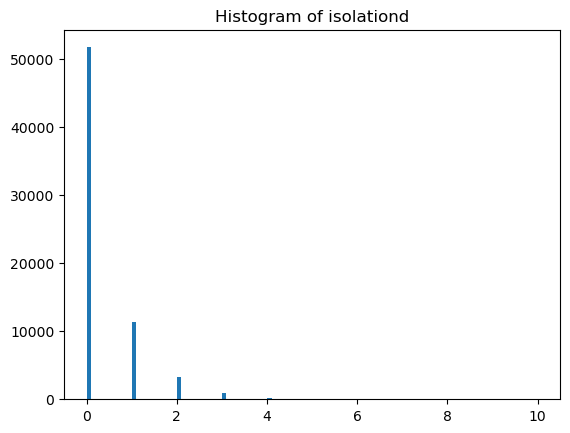

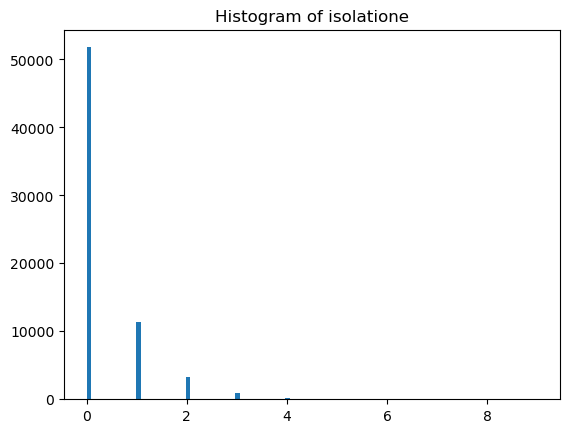

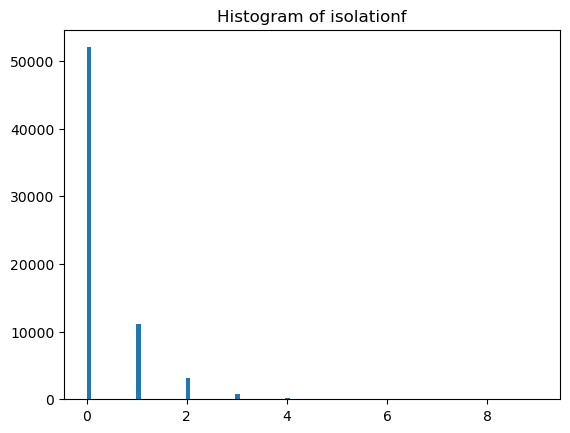

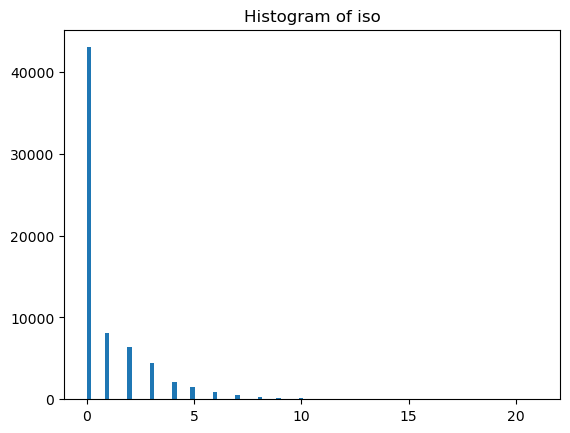

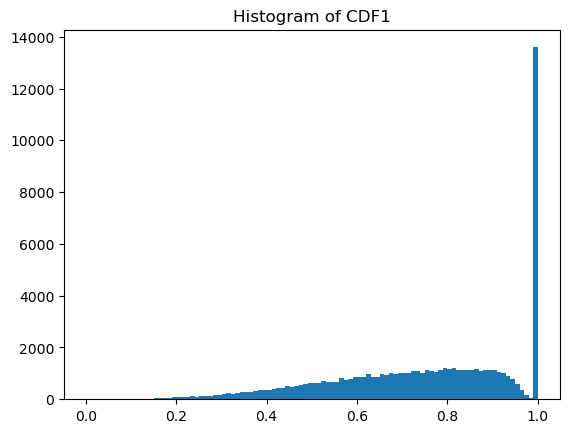

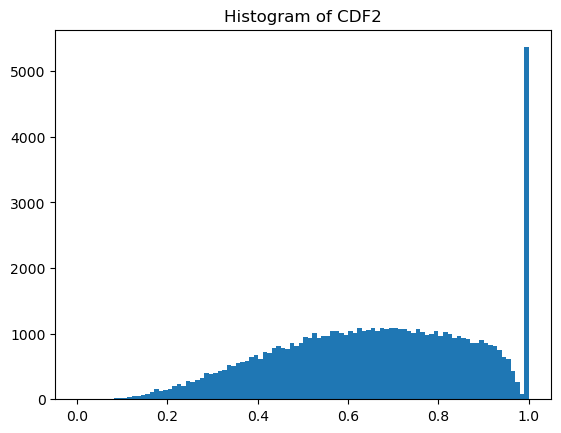

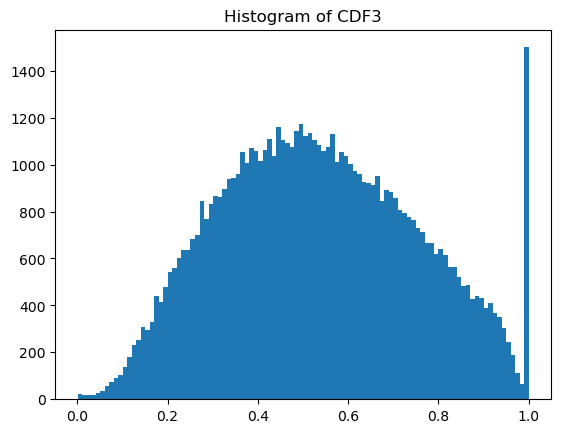

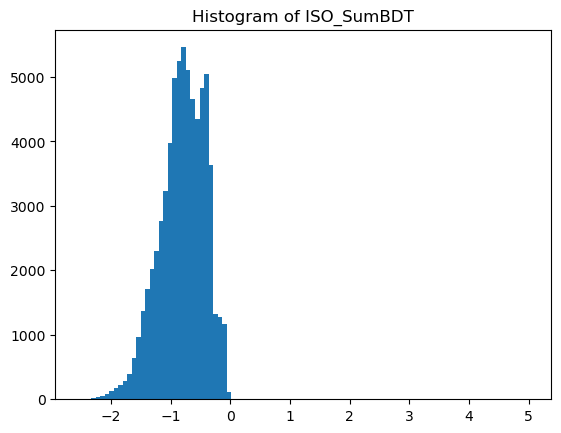

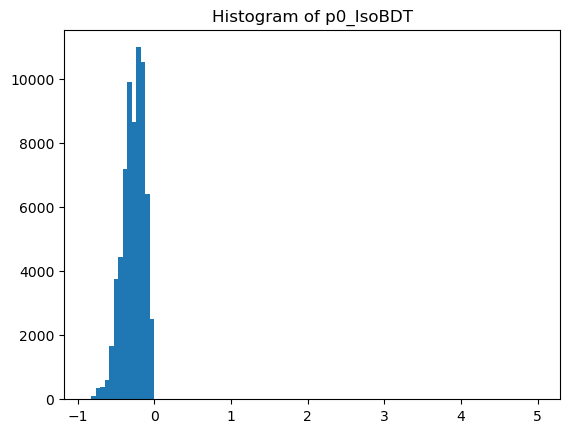

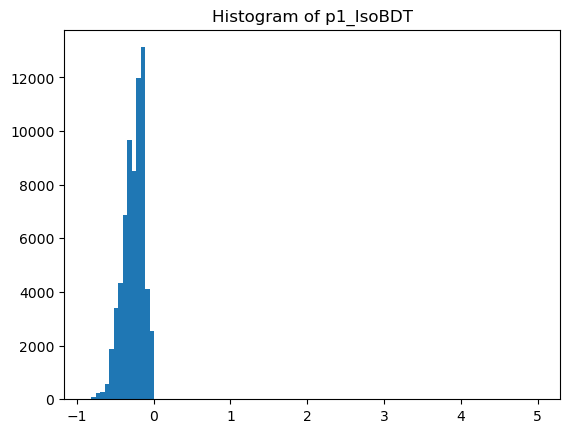

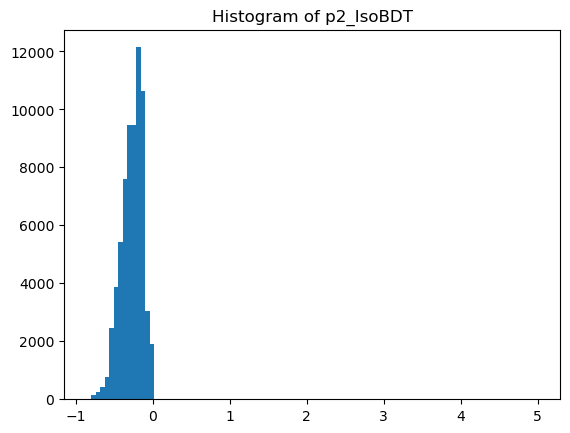

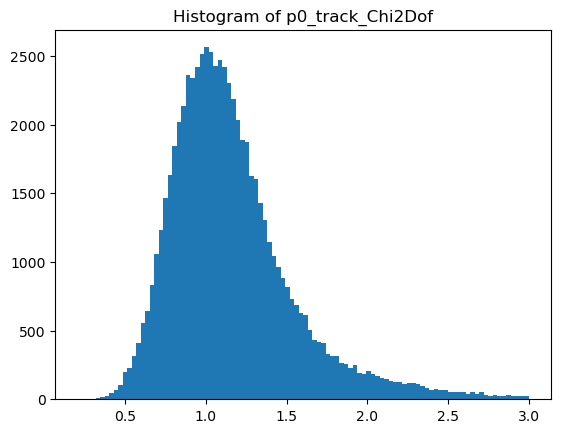

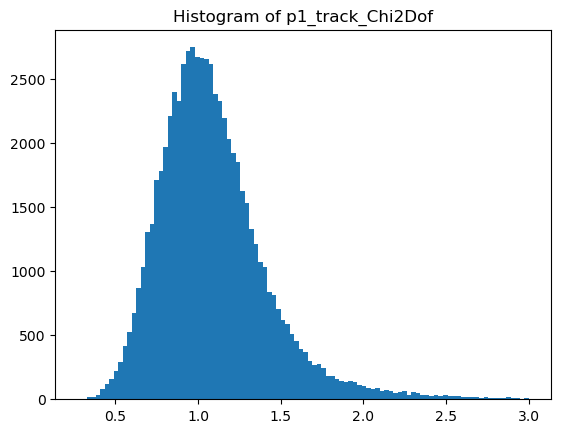

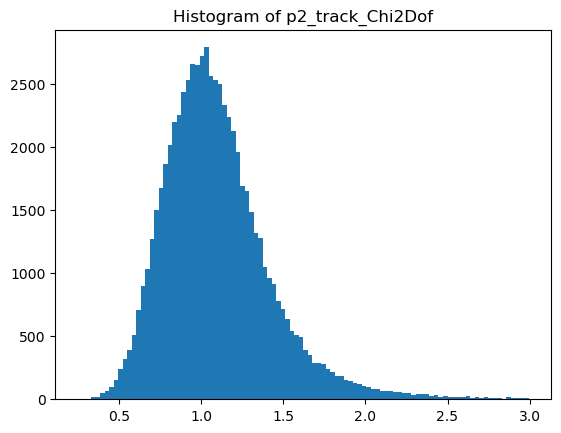

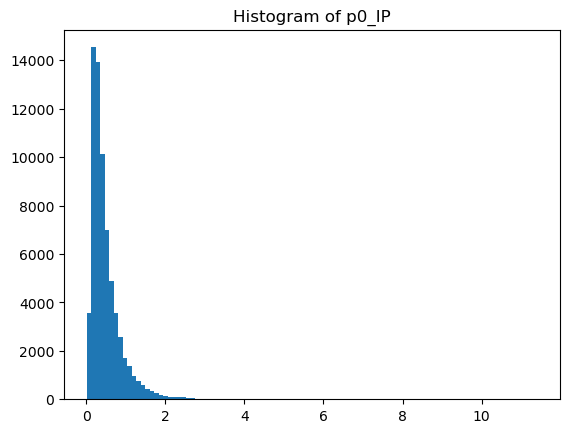

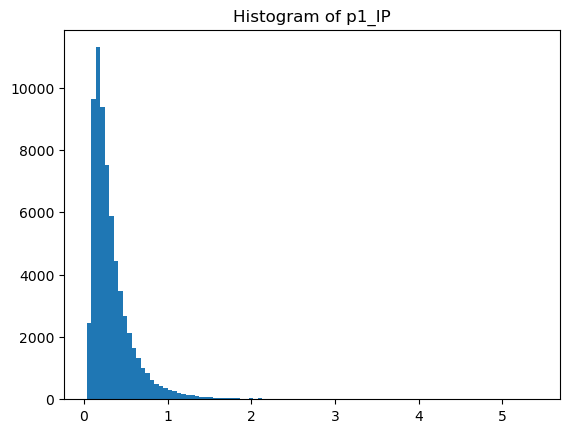

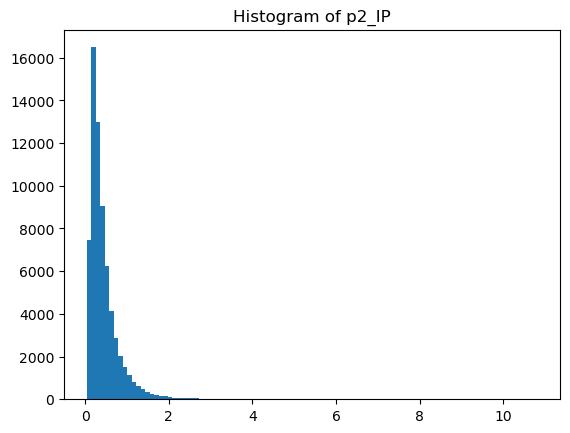

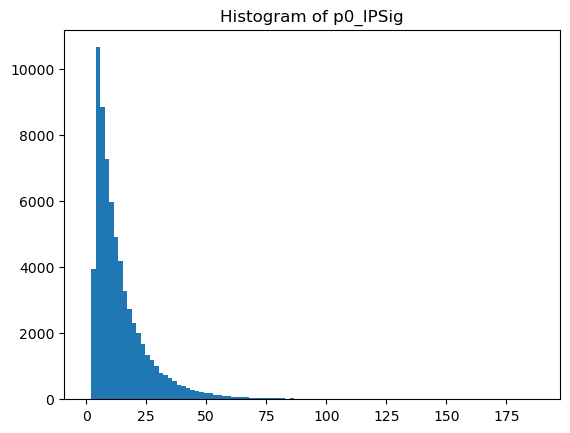

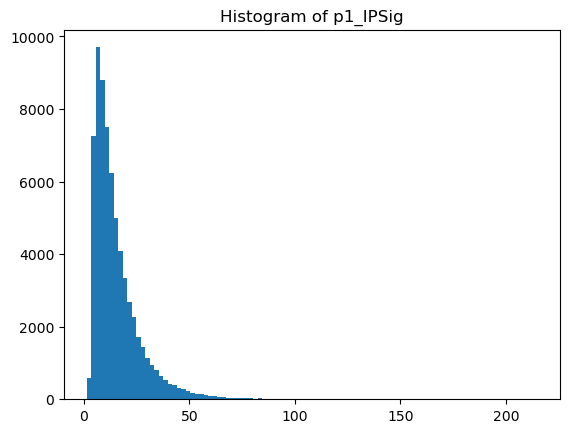

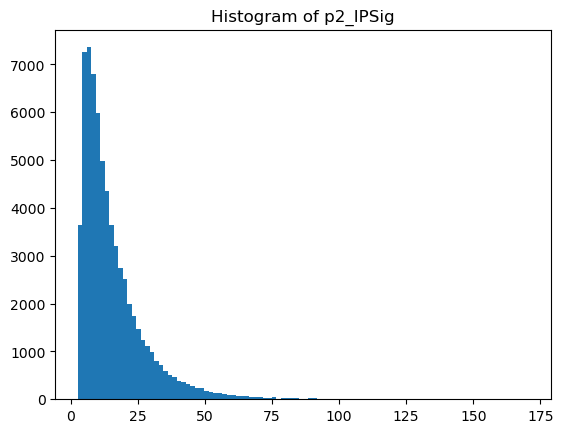

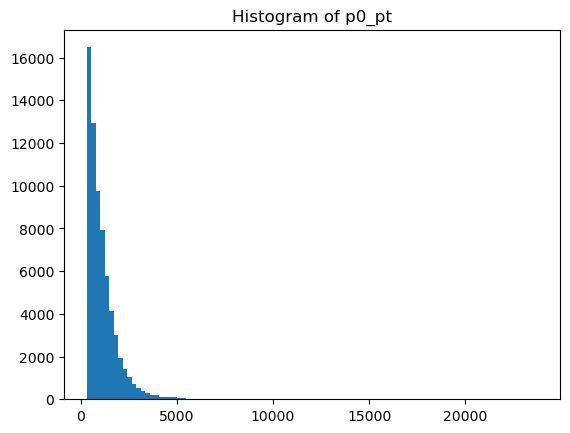

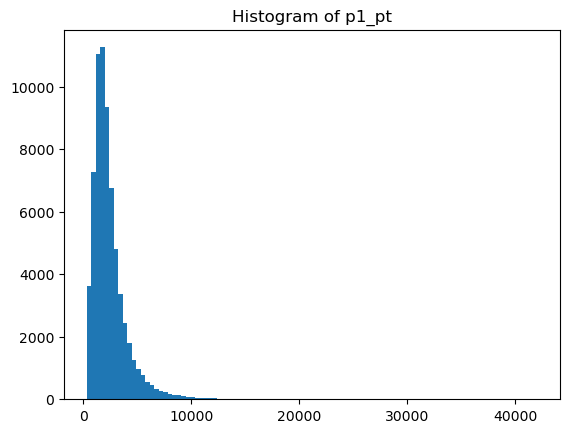

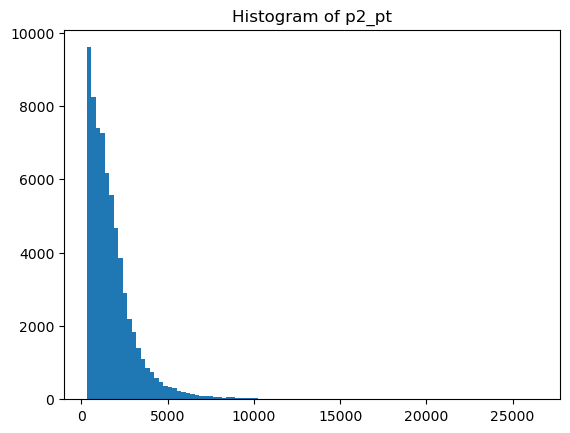

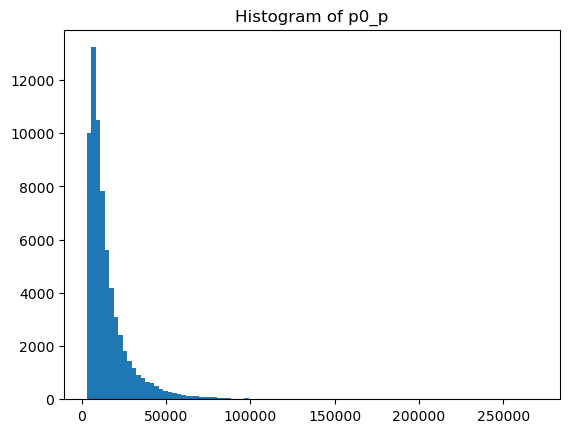

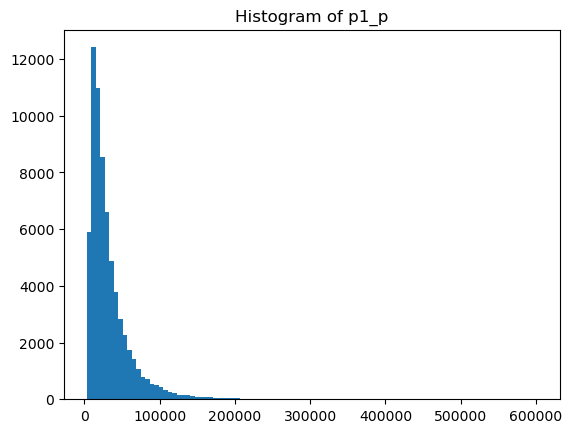

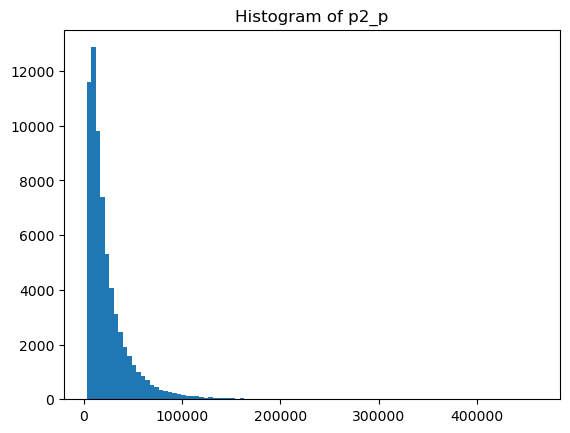

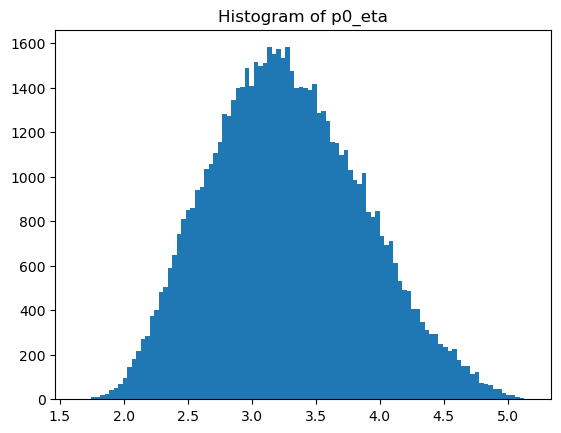

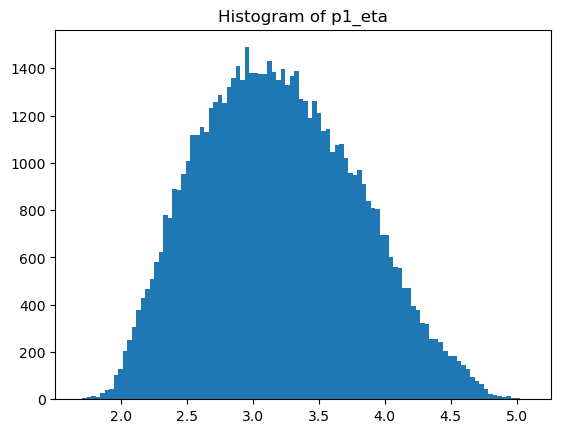

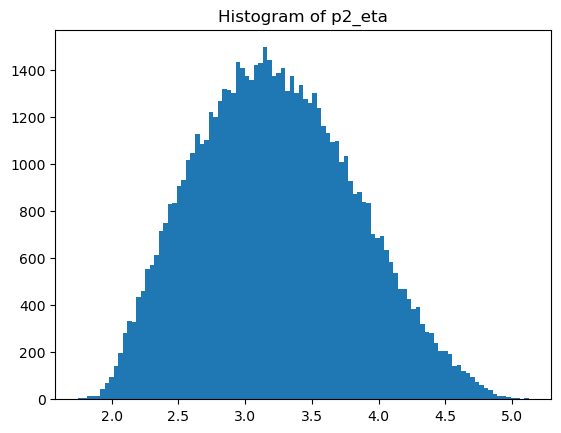

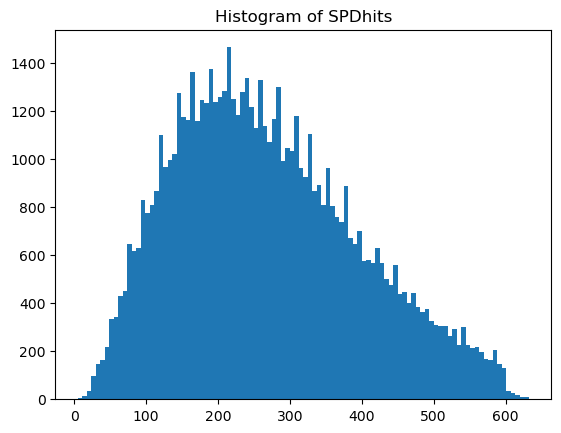

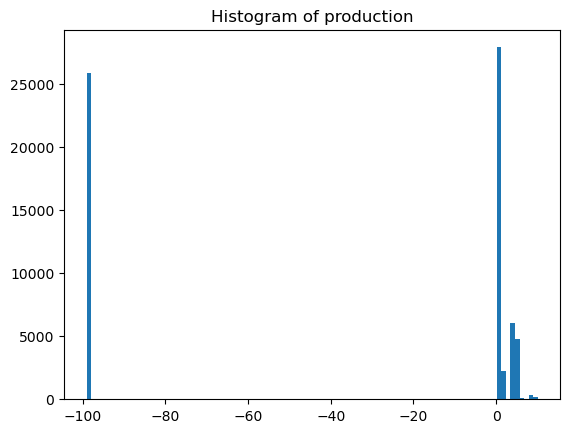

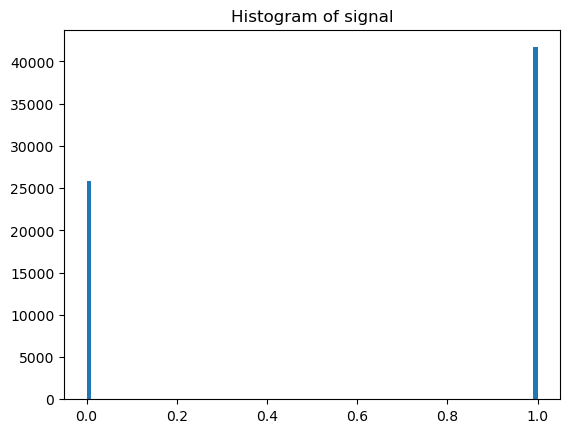

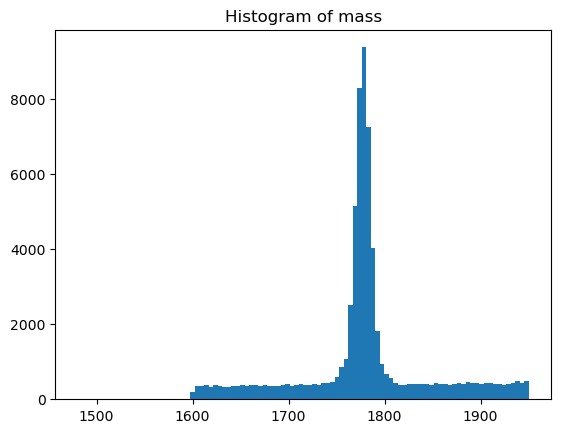

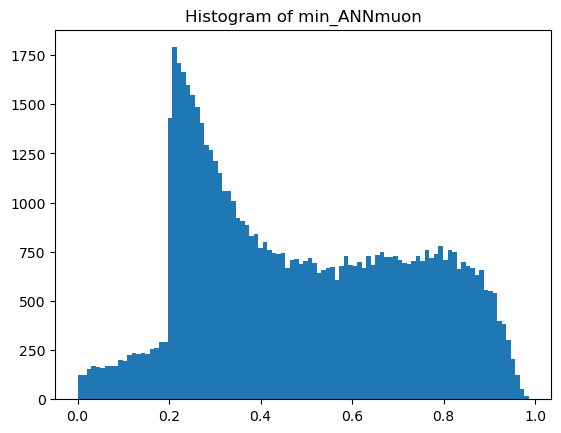

In [59]:
# Let's explore the histograms of each attribute

for i in range(len(attribute)):
    plt.hist(train_df[attribute[i]], bins=100)
    plt.title('Histogram of ' + attribute[i])
    # Save image in dataset directory
    plt.savefig(Path(dataset_path, 'histogram_of_' + attribute[i]))
    plt.show()

**Inference of plotting histogram of all the attributes**

From above histograms, we can see that 

- many attributes lie in a very close region.
- Many attributes looks like categorical.
- Few attributes have outlier too.

In [46]:
img_path = Path(dataset_path, 'histogram_of_' + attribute[0])
img_path

WindowsPath('c:/Users/rames/Desktop/GitHub/deep_learning/datasets/flavours-of-physics/histogram_of_id')